<h1><center> Machine Learning Algorithms for Used-Car Price Prediction in India</center></h1>

## <center><b style="color:#1c4966; font-size:18px">By Boluwatife Yebisi, A0174604</b></center>

## Introduction
The primary goal is to develop a machine learning model capable of reliably predicting used car prices in India. Several supervised learning algorithms will be deployed to train models based on used car data. The study compares these algorithms using appropriate evaluation metrics to determine which algorithm will best predict used-car prices on unseen data to obtain the most reliable model. The model obtained could help car dealers and private sellers determine a competitive price for used cars and allow potential buyers to estimate a reasonable cost, maximising profits for all parties.

The dataset used is available at https://www.kaggle.com/sukhmanibedi/cars4u.

The Machine Learning Tasks used in this application include:
 1. Data Preprocessing
 - Obtain a dataset
 - Import all important libraries
 - Import the dataset 
 - Descriptive Statistics
 - Exploratory Data Analysis and Visualization
 - Identifying and handling Missing Values
 - Encoding Categorical Data
 - Feature Selection
 - Train and Test Split
 - Feature Scaling
 2. Modeling
 - Algorithm Selection
 - Training a Model
 - Make Prediction with Test Set
 - Model Evaluation
 - Improve algorithm by Hyper parameter tuning
 - Compare Algorithms based on evaluation metrics 
 - Chose best algorithms

## 1. Data Preprocessing

### 1.1 Obtain a dataset

The dataset used is available at https://www.kaggle.com/sukhmanibedi/cars4u

### 1.2 Import Libraries

In [1]:
#import libraries 
import pandas as pd
import numpy as np

#import libraries for data visualization
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

#import library for categorical data encoding
from sklearn.preprocessing import LabelEncoder

#import library for train test split
from sklearn.model_selection import train_test_split

#import library for feature scaling
from sklearn.preprocessing import StandardScaler

#import libraries for selected algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#import libraries for neural networks algorithm
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import Adam

#import library for model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, SCORERS

#import library for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

### 1.3 Import the dataset 

In [2]:
#insert the dataset
df = pd.read_csv("dataset/used_cars_data.csv", index_col=0)

#### 1.3.1 Basic Information About the Dataset

In [3]:
#display first five rows of the dataset
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#Obtain the number of rows and columns in the dataset
print("There are %s rows and %s columns in the dataset" % (df.shape[0], df.shape[1]))

There are 7253 rows and 13 columns in the dataset


In [5]:
#Get the features of the dataset
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [6]:
#Get basic info about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
#view the no of missing values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

'New_Price' should be dropped due to the number of missing entries.

In [8]:
#drop new price variable
df = df.drop('New_Price', axis=1)

In [9]:
#view the number of rows and columns after dropping new price
df.shape

(7253, 12)

In [10]:
#view data types of each feature
print(df.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


Horse'Power' , 'Engine' capacity, 'Mileage' features are objects but should be dtype float. No of seats should be categorical

#### 1.3.2 Converting 'Power','Engine' and 'Mileage' variables to dtype float

In [11]:
#lets view 'Power', 'Engine'and'Mileage' using picking a random sample from the table
df[['Power', 'Engine', 'Mileage']].sample(10)

,Power,Engine,Mileage
S.No.,,,
978,130.2 bhp,1799 CC,14.8 kmpl
2821,81.86 bhp,1197 CC,17.19 kmpl
4919,121.3 bhp,1591 CC,17.1 kmpl
6594,68.05 bhp,998 CC,20.3 kmpl
6051,68.05 bhp,1086 CC,19.81 kmpl
6641,88.7 bhp,1199 CC,18.7 kmpl
4796,103.6 bhp,1598 CC,14.4 kmpl
3820,67.1 bhp,998 CC,24.07 kmpl
78,102 bhp,2494 CC,12.8 kmpl


'Power', 'Engine', 'Mileage' dtype objects because of the units attached. The table above shows that 'Power', 'Engine'and'Mileage' all have units

Coverting 'Power' into float by removing 'bhp'

Pandas.series.str.rstrip allows you to remove whitespaces or a set of specified characters from each string

In [12]:
#remove the bhp and whitespace from each Power entry
df['Power'] = df['Power'].str.rstrip(" bhp")

Coverting 'Engine' into float by removing 'CC'

In [13]:
#remove the CC and whitespace from each Engine entry
df['Engine'] = df['Engine'].str.rstrip(" CC")

Mileage has two units 'kmpl' and 'km/g' which are mathematically equivalent

In [14]:
#remove the kmpl and whitespace from mileage entry
df['Mileage'] = df['Mileage'].str.rstrip(" kmpl")

#remove the km/g and whitespace from mileage entry
df['Mileage'] = df['Mileage'].str.rstrip(" km/g")

Now lets view random samples for the table to see whether units still exist. 

In [15]:
#view random samples for the table to see whether units still exist.
df[['Power', 'Engine', 'Mileage']].sample(10)

,Power,Engine,Mileage
S.No.,,,
1244,100.6,2494,12.99
5764,67.1,998,20.92
6829,168.5,2982,12.55
6283,74,1248,25.2
2124,83.1,1197,21.4
6585,81.80,1197,22.0
3204,88.76,1248,20.77
1912,34.2,796,16.8
3290,null,1399,17.8


It is impractical for a car to horse power, engine capacity and mileage of 0

In [16]:
#to check if theres any row with power equal to zero
df.loc[df['Power'] == '0.0'].shape[0]

0

In [17]:
#no of rows that have mileage = 0.
df.loc[df['Mileage'] == '0.0'].shape[0]

81

At the point of data collection and entry; 0 was entered for mileage. 

In [18]:
#replace the zero values with NAN so we can clean properly.
df['Mileage'].replace('0.0', value=np.nan, inplace=True)

In [19]:
#check to see if its been replaced
df.loc[df['Mileage'] == '0.0'].shape[0]

0

In [20]:
#to check if theres any row with engine output equal to zero
df.loc[df['Engine'] == '0.0'].shape[0]

0

In [21]:
#check for all features has string 'null' values 
df.loc[:, (df == 'null').any()].count()

Power    7207
dtype: int64

Power has the text 'null' for some fields to represent empty or null values. In order to convert to float, we have to deal with the 'null' string that appears in Power Column. They are not categorical variables. we convert the text to nans and deal with them later

In [22]:
#return rows that have a power of null
df.loc[df['Power'] == 'null'].shape[0]

129

129 rows with power null

In [23]:
#replace String "null" with 'nan' so we can easily convert Power to a float and handle null values better. 
df['Power'] = df['Power'].replace(regex="null", value=np.nan)

In [24]:
#test to see if null values have been taken care of. 
df.loc[df['Power'] == 'null'].shape[0]

0

Null text have been taken care of

In [25]:
#coverting Power, Mileage and Engine features to float 
df['Power'] = df['Power'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)

In [26]:
#view data types of each feature
print(df.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


Horse'Power' , 'Engine' capacity, 'Mileage' features are dtype float. 

#### 1.3.3 Converts 'Seats' Feature to categorical

In [27]:
#no of rows with value 0 for seat feature
df.loc[df['Seats'] == 0].shape[0]

1

only 1 car has zero seats. It is impractical for a car to have zero seats. 

In [28]:
#lets replace that with nan
df['Seats'].replace(0.0, np.nan, inplace=True)

In [29]:
#test to see if theres any car with zero seats
df.loc[df['Seats'] == 0].shape[0]

0

In [30]:
#convert seat to categorical
df['Seats'] = df['Seats'].astype(object)

In [31]:
df['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [32]:
#view data types of each feature
print(df.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                 object
Price                float64
dtype: object


### 1.4 Descriptive Statistics

#### 1.4.1 Description of numerical data

In [33]:
#description of numerical data
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,7253.000000,7.253000e+03,7170.000000,7207.000000,7078.000000,6019.000000
mean,2013.365366,5.869906e+04,18.346527,1616.573470,112.765214,9.479468
std,3.254421,8.442772e+04,4.157910,595.285137,53.493553,11.187917
min,1996.000000,1.710000e+02,6.400000,72.000000,34.200000,0.440000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,3.500000
50%,2014.000000,5.341600e+04,18.200000,1493.000000,94.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,160.000000


### Observations

 - Years of cars are from 1996 t0 2019
 - The Mean Kilometers_driven is approximately 59,000km while maximum kilometers driven is 6,500,000km which is extremely high for a car. This seems to be an outlier and will be investigated further. 

#### 1.4.2 Description of categorical data

In [34]:
#description of categorical data
round(df.describe(exclude = ['float64', 'int64']))

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats
count,7253,7253,7253,7253,7253,7199.0
unique,2041,11,5,2,4,8.0
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,5.0
freq,55,949,3852,5204,5952,6047.0


### 1.5 Exploratory Data Analysis (EDA) and Visualization 

We would like to check the spread of data using barplots.

#### 1.5.1 Visualization for numerical columns

In [35]:
#collect all the numerical columns into a list
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

In [36]:
#find the length of the numeric columns
len(numeric_cols)

6

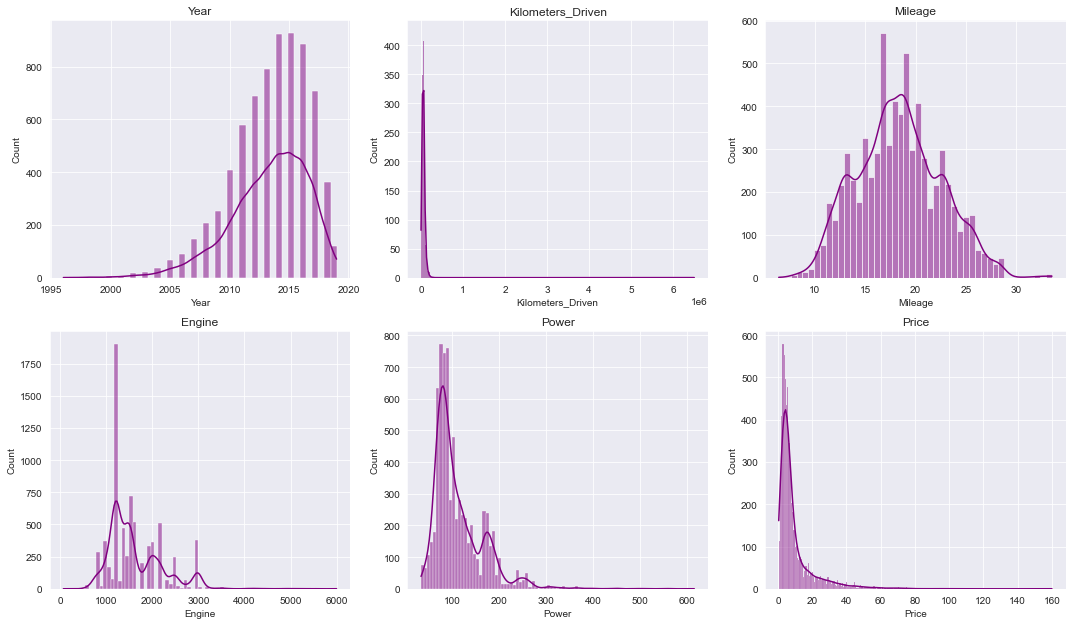

In [37]:
# plt.style.use('ggplot')
#plots for all numerical variables
fig, axes = plt.subplots(figsize=(15,30))
#7 columns present
for i in range(len(numeric_cols)):
    sns.set_style("darkgrid")
#     to suggest how the charts be displayed 
    plt.subplot(7, 3, i+1)
#     to plot the histogram
    sns.histplot(df[numeric_cols[i]], kde=True, color='purple')
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot. 
    plt.title(numeric_cols[i])
plt.show()

 #### Observations
 - Year is left skewed which indicates that outliers are present on the lower side
 - Kilometer_driven, Engine, Power and Price are all right skewed which suggests outliers are on the higher side
 - Mileage is almost normally distributed
 - Majority of the cars have 5 seats
 
 Outliers will be properly investigated as we progress.
 

#### 1.5.2 Visualization for categorical columns

In [38]:
#collect all the categorical columns into a list
cate_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cate_cols

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

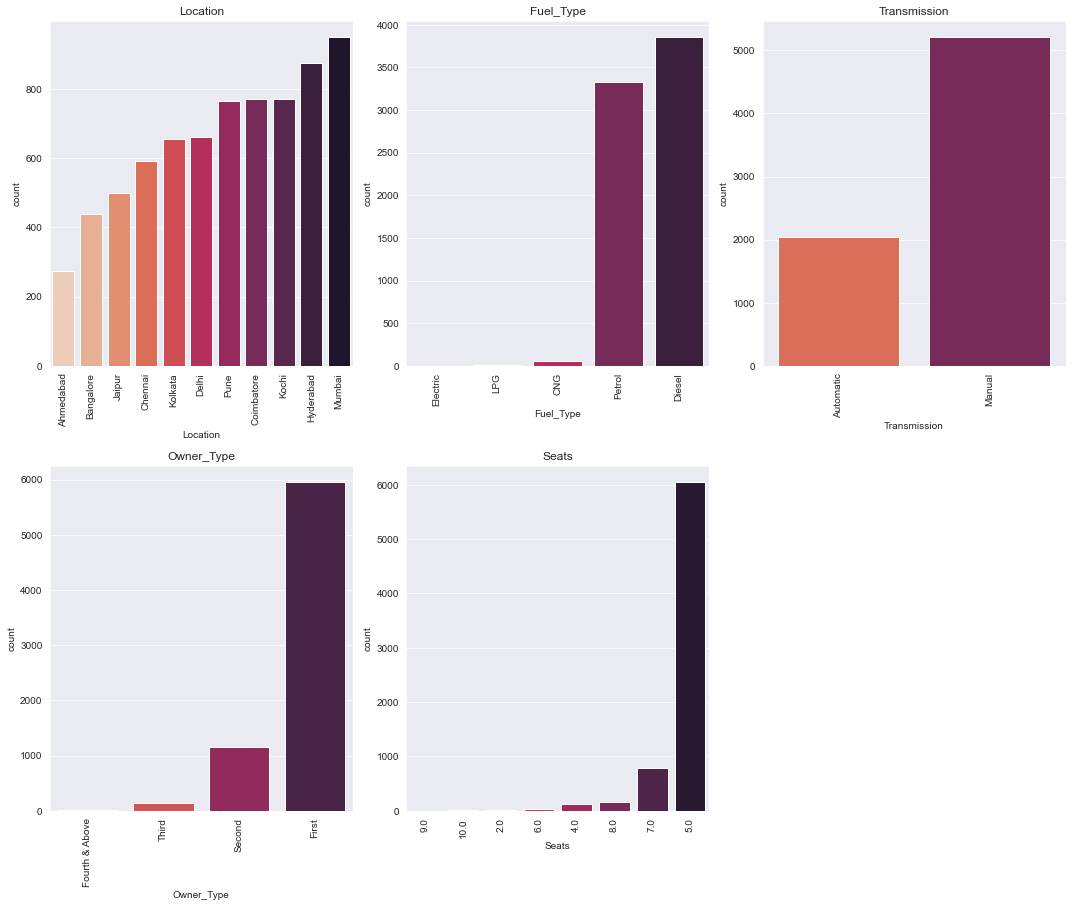

In [39]:
#plots for all categorical variables excluding Name variable
fig, axes = plt.subplots(figsize=(15,30))
#5 columns present excluding Car Model as Car Make is already present

for i in range(len(cate_cols)-1):
    sns.set_style("darkgrid")
#     to suggest how the charts will be displayed 
    plt.subplot(5, 3, i+1)
#   order categorical values for better visualization
    order = df[cate_cols[i+1]].value_counts(ascending=True).index
    
#     to plot the countplot for categorical values
    sns.countplot(x = df[cate_cols[i+1]], data=df, order=order, palette='rocket_r')
#     rotate the labels of the x-axis
    plt.xticks(rotation=90)
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot. 
    plt.title(cate_cols[i+1])
plt.show()

 #### Observations
 - Location: Mumbai has the largest amount of cars for sale while Ahmedabad has the least
 - Fuel Type: Most of the vehicles available for purchase are diesel cars and this is closely followed by petrol cars
 - Transmission: Most of the vehicles available for sale are have manual gear boxes
 - OwnerType: Most of the vehicles available are first owned and not second hand
 - Car Make: Most of the cars available for sale are either Maruti or Hyundai cars. 

#### 1.5.3 Plots of Target Variable 'Price" Against Numerical values

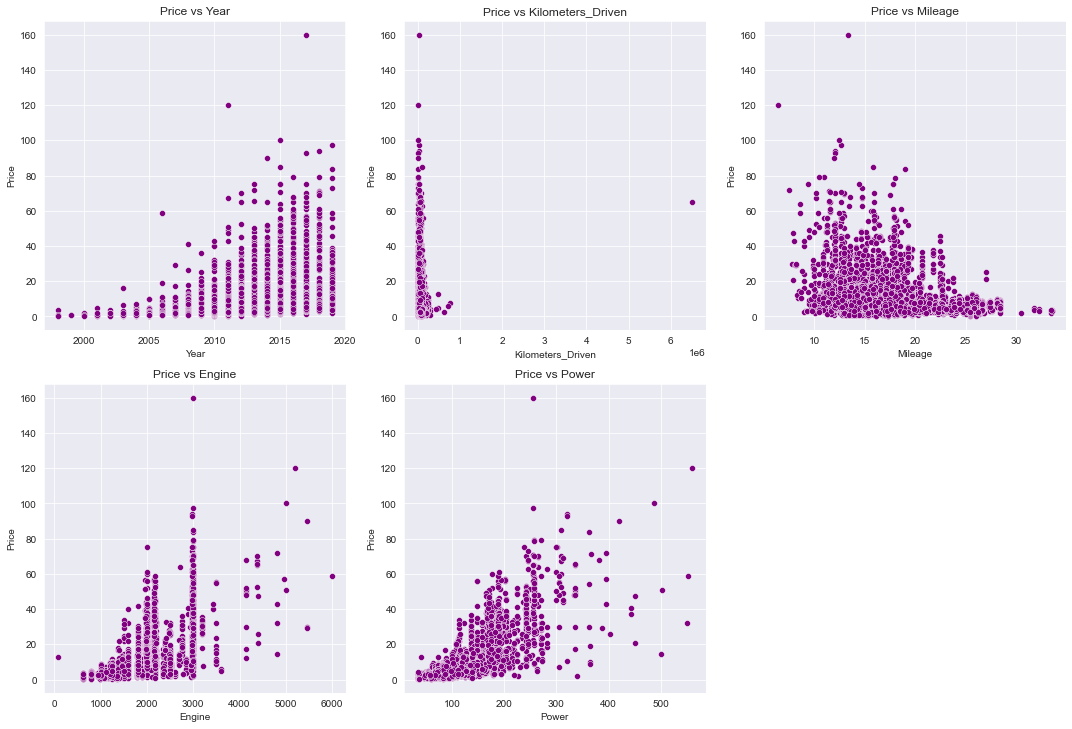

In [40]:
#plots for price against other numerical variables
fig, axes = plt.subplots(figsize=(15,30))
#6 columns present 
for i in range(len(numeric_cols)-1):
    sns.set_style("darkgrid")
#     to suggest how the charts be displayed 
    plt.subplot(6, 3, i+1)
#     to plot the scatterplot
    sns.scatterplot(x = df[numeric_cols[i]], y=df['Price'], color='purple')
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot. 
    plt.title("Price vs %s" % (numeric_cols[i]))
plt.show()

Already some outliers are detected. Here we have to be very careful with outliers for each column. 

The outliers that exist in this chart cannot simply be dropped. For example the prices of luxury cars irrespective of the year, kilometers_driven, mileage, engine, power will be significantly high compared to those of other cars. These prices will appear as outliers and simply cannot be dropped.

With regards, to kilometers driven, there appears to be one outlier due to incorrectly entered or measured data. Lets take a better look as kilometers driven using boxplots

<AxesSubplot:>

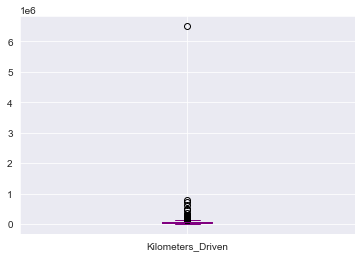

In [41]:
#create a boxplot for "Kilometers_Driven"
df.boxplot(column=['Kilometers_Driven'], color='purple')

#### Dealing with Outlier

Replacing the outlier value with the upper quartile value 

In [42]:
#get outlier value2
outlier_val_km = df['Kilometers_Driven'].max()
print("Outlier value is %s" % outlier_val_km)

Outlier value is 6500000


In [43]:
#Obtaining IQR for Kilometers driven
IQR_Kilometers_Driven = df['Kilometers_Driven'].quantile(0.75) - df['Kilometers_Driven'].quantile(0.25)
print("Interquartile range for Kilometers_Driven is %s" % IQR_Kilometers_Driven)

Interquartile range for Kilometers_Driven is 39000.0


In [44]:
#obtaining upperlimit
Upper_Km_Driven = df['Kilometers_Driven'].quantile(0.75) + 1.5*IQR_Kilometers_Driven
print("Upperlimit  range for Kilometers_Driven is %s" % Upper_Km_Driven)

Upperlimit  range for Kilometers_Driven is 131500.0


In [45]:
#for km driven replace the outlier value with the upperlimit. 
df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] >= outlier_val_km, Upper_Km_Driven, df['Kilometers_Driven'])

<AxesSubplot:>

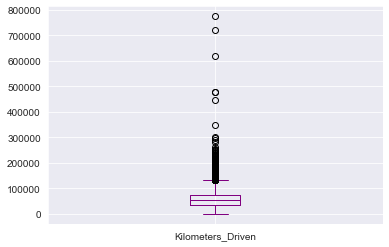

In [46]:
#visualize the boxplot to see if the outlier value has been taken care of
df.boxplot(column=['Kilometers_Driven'], color='purple')

The other outliers that exist cannot be dropped as they are possible Kilometers_driven by vehicles. The very high outlier has been dealt with, the ones left can be standardized

#### 1.5.4 Plots of Target Variable 'Price" Against Numerical values based on Transmission

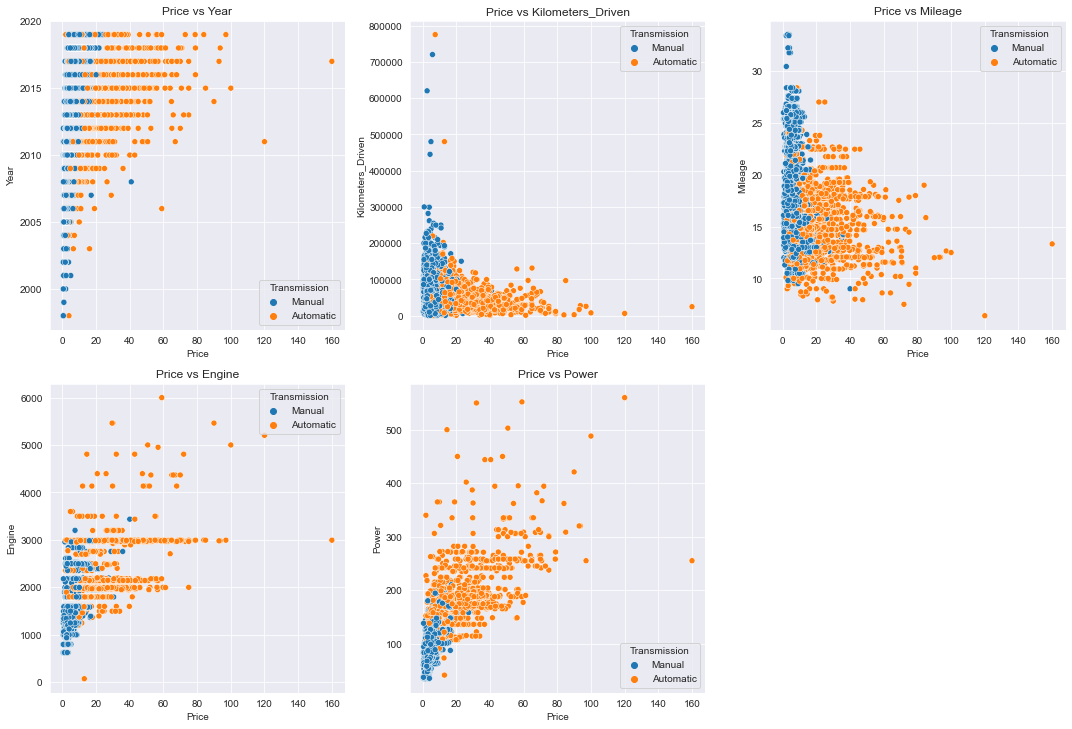

In [47]:
#plots for price against other numerical variables
fig, axes = plt.subplots(figsize=(15,30))
#6 columns present 
for i in range(len(numeric_cols)-1):
#     to suggest how the charts be displayed 
    plt.subplot(6, 3, i+1)
#     to plot the scatterplot
    sns.scatterplot(x =df['Price'], y=df[numeric_cols[i]], hue=df['Transmission'], data=df)
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot. 
    plt.title("Price vs %s" % (numeric_cols[i]))
plt.show()

#### Observations
 - The newer cars are mostly automatic and more expensive
 - Most of the cars with lower kilometers driven are automatic and expensive
 - Majority of the cars with lower mileage are more expensive and automatic transmission
 - Cars with bigger engine capacities are more expensive and are majorly automatic transmission
 - Cars with more power are majorly automatic are more expensive
 
In summary, more expensive cars use Automatic transmission. 

#### 1.5.5 Plots of Target Variable 'Price" Against Numerical values based on Fuel Type

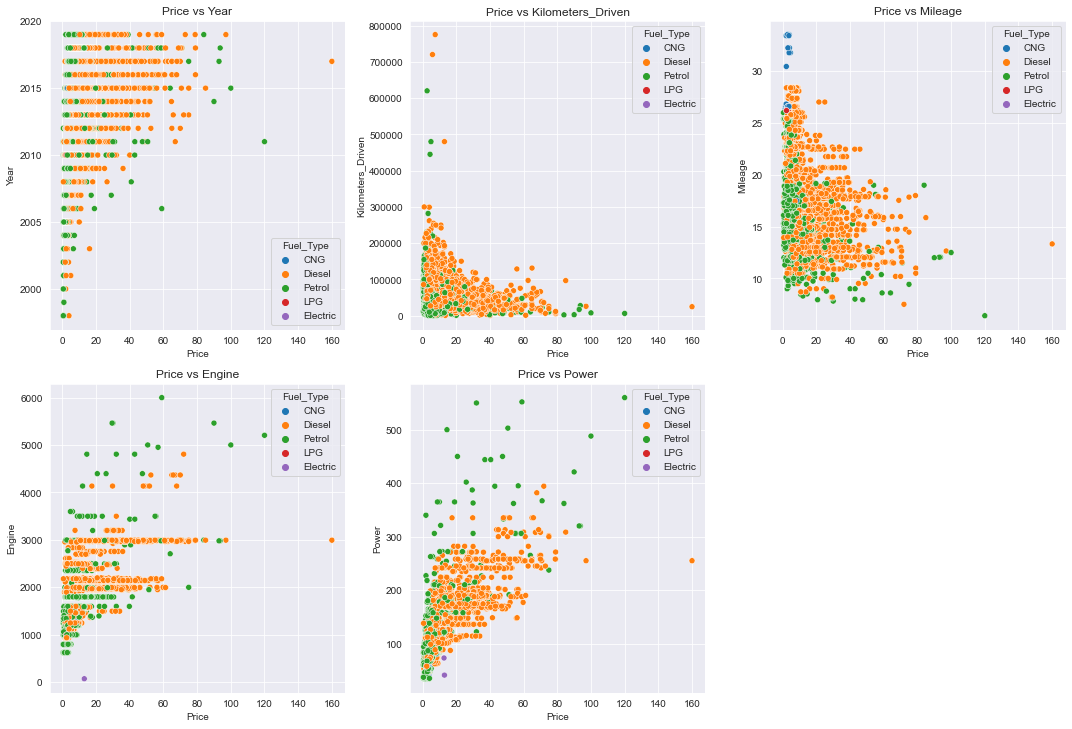

In [48]:
#plots for price against other numerical variables
fig, axes = plt.subplots(figsize=(15,30))
#6 columns present 
for i in range(len(numeric_cols)-1):
#     to suggest how the charts be displayed 
    plt.subplot(6, 3, i+1)
#     to plot the scatterplot
    sns.scatterplot(x =df['Price'], y=df[numeric_cols[i]], hue=df['Fuel_Type'], data=df)
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot. 
    plt.title("Price vs %s" % (numeric_cols[i]))
plt.show()

#### Observations
 - Majority of vehicles up for sale are diesel and petrol vehicles, which is not so influential on the price of cars

#### 1.5.6 Plots of Target Variable 'Price" Against Numerical values based on Owner Type

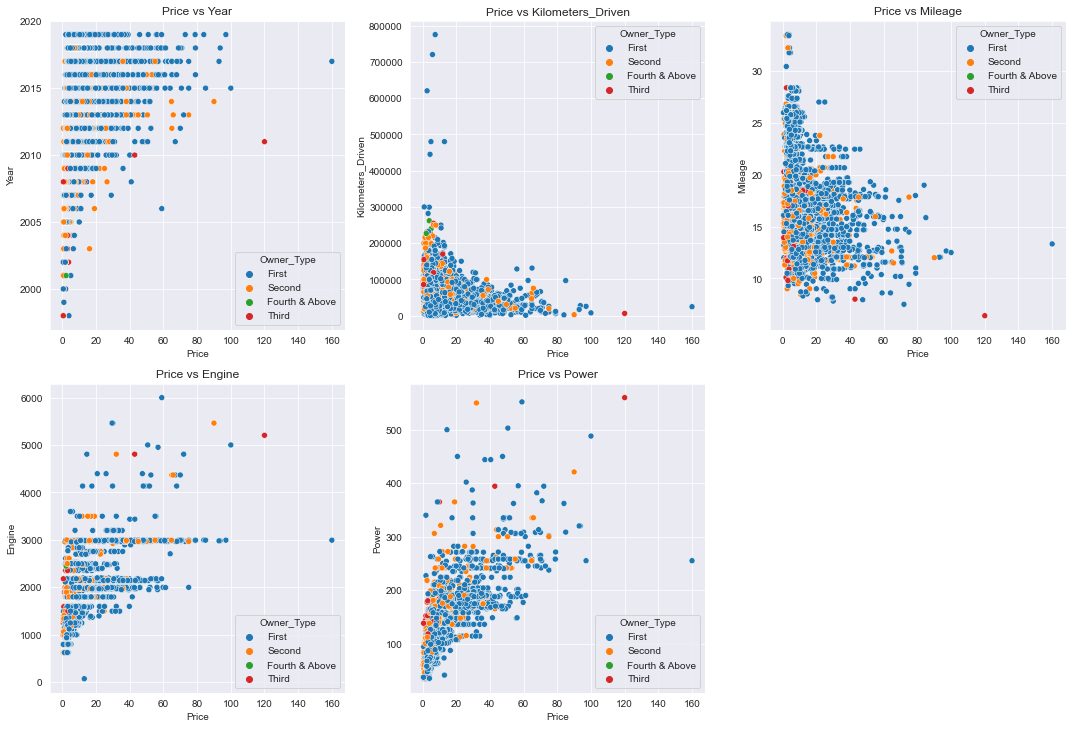

In [49]:
#plots for price against other numerical variables
fig, axes = plt.subplots(figsize=(15,30))
#6 columns present 
for i in range(len(numeric_cols)-1):
#     to suggest how the charts be displayed 
    plt.subplot(6, 3, i+1)
#     to plot the scatterplot
    sns.scatterplot(x =df['Price'], y=df[numeric_cols[i]], hue=df['Owner_Type'], data=df)
#     to make the layout well organized
    plt.tight_layout()
#     to title each plot. 
    plt.title("Price vs %s" % (numeric_cols[i]))
plt.show()

#### Observations
 - Majority of vehicles up for sale are first and second owned, with the most expensive cars being first owned cars. 

In [50]:
#top ten most expensive cars
df.nlargest(10, 'Price')['Name']

S.No.
4079    Land Rover Range Rover 3.0 Diesel LWB Vogue
5781                     Lamborghini Gallardo Coupe
5919                         Jaguar F Type 5.0 V8 S
1505                Land Rover Range Rover Sport SE
1974                             BMW 7 Series 740Li
1984                             BMW 7 Series 740Li
4691                 Mercedes-Benz SLK-Class 55 AMG
5535                      BMW X6 xDrive 40d M Sport
2095                       Mercedes-Benz SLC 43 AMG
1885           Mercedes-Benz GLS 350d Grand Edition
Name: Name, dtype: object

#### 1.5.7 Correlation Matrix

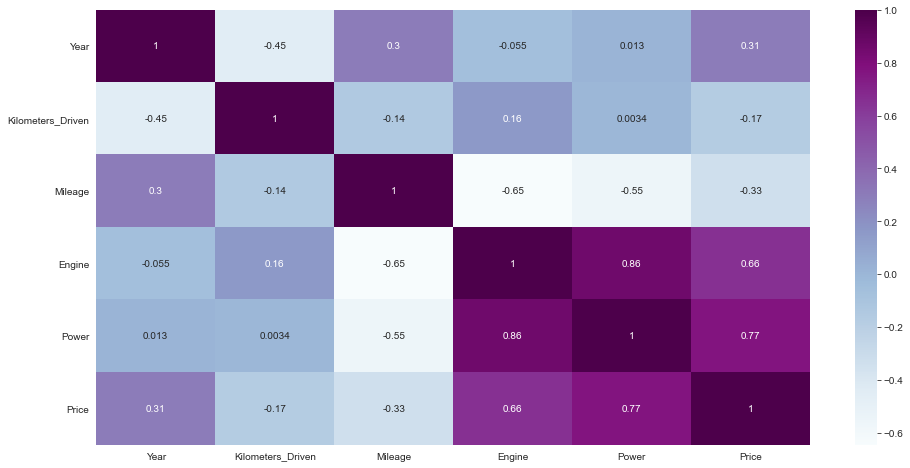

In [51]:
#plot correlation matrix
f, ax = plt.subplots(figsize=(16, 8))
dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.show()

The outliers that appear in the data cannot simply be dropped. 


### 1.6 Identifying and handling missing values 

In [52]:
# Check the features with missing values 
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
Price                1234
dtype: int64

<AxesSubplot:>

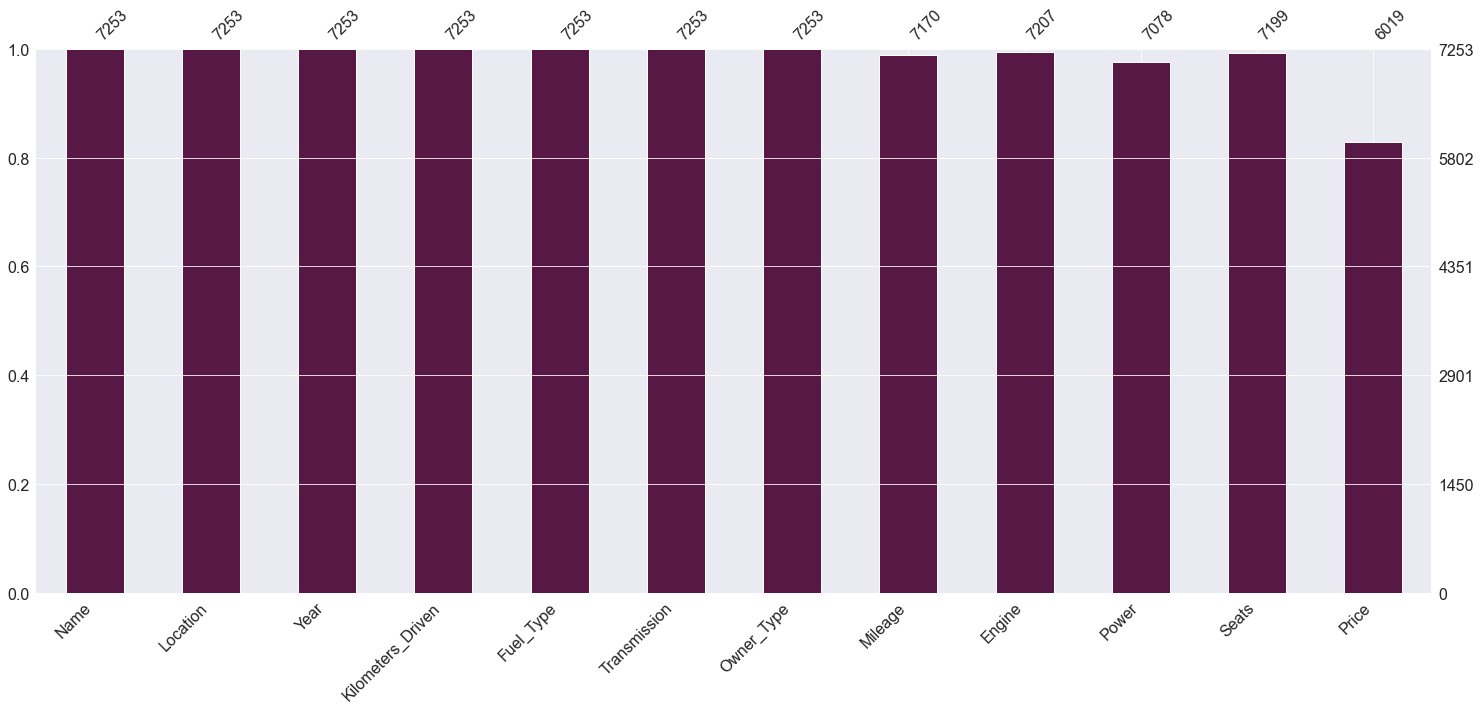

In [53]:
#Visualize the missing values
msno.bar(df, color="#581845")

#### Observations
 - 'New_Price' has 6247 out of 7253 missing entries
 - 'Price' which is our target variable has 1234 missing entries
 - 'Seats' has only 53 missing values and is important for deciding price
 - 'Power' and "Engine' both have 46 missing values
 - 'Mileage' has only 2 missing values
 - 'Power', 'Engine', 'Mileage' are supposed to be quantitative variables but they are of Dtype 'Object', hence need to be converted to numeric.


#### 1.6.1 Dealing with missing values

Before dealing with missing values, Feature engineering carried out on "Name" feature. Name of car brands has an effect on price of cars and price is our target variable. We split the "Name" column into 2 columns "Car Make" and "Car Model". This will also help to group some cars together to help fill missing values. We do this using str.split which allows you to split string by delimiter.

#### 1.6.1.1 Feature Engineering on "Name" variable

In [54]:
#spliting the "name" column into "Car Make" and "Car Model"
df['Car Make'] = df['Name'].str.split(' ').str[0]
df['Car Model'] = df['Name'].str.split(' ').str[1] + ' ' + df['Name'].str.split(' ').str[2]

In [55]:
#inspect the data
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car Make,Car Model
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New


Its important to inspect the "Car Makes" to see the unique values to be sure car makes are not repeated the same value

In [56]:
#check unique values of 'Car Make'
df['Car Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

Some names of cars seem incomplete or repeated or incorrect
 - 'ISUZU' and 'Isuzu' are the same
 - 'Land' should be 'Land Rover'
 - 'OpelCorsa'car make seems to be joined with car model

In [57]:
#place the car make with issues into a list
car_make_inc = ['ISUZU', 'Isuzu', 'Land']
#random sample of car makes listed above
df[df['Car Make'].isin(car_make_inc)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car Make,Car Model
S.No.,,,,,,,,,,,,,,
2178,Land Rover Discovery HSE Luxury 3.0 TD6,Mumbai,2017,35000.0,Diesel,Automatic,First,18.00,2993.0,255.00,7.0,41.60,Land,Rover Discovery
1513,Land Rover Range Rover 2.2L Pure,Bangalore,2014,56000.0,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,34.50,Land,Rover Range
3752,Land Rover Range Rover Sport HSE,Kochi,2015,38467.0,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,70.66,Land,Rover Range
6434,Land Rover Discovery 4 SDV6 SE,Kochi,2012,89190.0,Diesel,Automatic,Second,11.40,2993.0,245.41,7.0,NaN,Land,Rover Discovery
5067,Land Rover Discovery Sport SD4 HSE Luxury 7S,Coimbatore,2019,17201.0,Diesel,Automatic,First,12.51,2179.0,187.70,7.0,58.91,Land,Rover Discovery


In [58]:
#replace the "ISUZU" with "Isuzu"
df['Car Make'].replace('ISUZU', 'Isuzu', inplace=True)

In [59]:
#replace the "Land" with "Land Rover"
df['Car Make'].replace('Land', 'Land Rover', inplace=True)

In [60]:
#View the OpelCorsa 
df.loc[df['Car Make'] == 'OpelCorsa']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car Make,Car Model
S.No.,,,,,,,,,,,,,,
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000.0,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,OpelCorsa,NaN


Car Model appears to be NAN which because car model is joined to car make

In [61]:
#replace Car Make with appropriate value
df['Car Make'].replace('OpelCorsa', 'Opel', inplace=True)
#replace Car Model with appropriate value
df['Car Model'].replace(np.nan, 'Corsa', inplace=True)

In [62]:
##check unique values of 'Car Make' after replacement
df['Car Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'Opel'], dtype=object)

In [63]:
#view the number of cars for each car make in the dataset
df['Car Make'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
Opel                1
Name: Car Make, dtype: int64

In [64]:
# view number of unique Car Models 
df['Car Model'].nunique()

727

In [65]:
#number of unique Car Models for top 10 highest number of car models in the dataset
df['Car Model'].value_counts().nlargest(10)

Swift Dzire    189
Grand i10      179
Wagon R        178
Innova 2.5     145
Verna 1.6      127
City 1.5       122
City i         115
Creta 1.6      110
New C-Class    110
3 Series       109
Name: Car Model, dtype: int64

We have broken down the name column to 'Car Make' and 'Car Model' hence we can drop name column

In [66]:
#drop name column
df = df.drop(columns=['Name'])

#### 1.6.1.2 Handle Engine, Power & Seats Missing Values

Cars with the same 'Car Make' and 'Car Model' can have a similar Engine size, Power and No of Seats. In this case, those cars that have any of the values missing can be replaced with the median of the missing values

#### Grouping Cars by Car Make and Car Model

In [67]:
#replace the missing engine values with the median of engine values of cars in the same group using median becasue 
df['Engine'] = df.groupby(['Car Make','Car Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [68]:
#replace the missing powervalues with the median of power values of cars in the same group
df['Power'] = df.groupby(['Car Make','Car Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [69]:
#replace the missing Seat number values with the mode of seat values of cars in the same group
df['Seats'] = df.groupby(['Car Make','Car Model'])['Seats'].apply(lambda x:x.fillna(x.mode()))

In [70]:
#lets view the missing  values 
cols = ['Engine', 'Power', 'Seats']
df[cols].isnull().sum()

Engine    18
Power     63
Seats     54
dtype: int64

The number of missing values have reduced drastically
 - Engine: No of missing values reduced from 46 to 18
 - Power: No of missing values reduced from 175 to 63
 - Seats: No of missing values reduced from 54 to 23

Cars with similar Car Makes might have similar engine size

In [71]:
#replace the missing engine values with the median of engine values of cars in the same group
df['Engine'] = df.groupby(['Car Make'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [72]:
#view missing values of Engine variable
df['Engine'].isnull().sum()

0

There are no longer missing values for engine

Cars with similar Engine capacity may produce the same Power output. 

In [73]:
#replace the missing power values with the median of power values of cars in the same engine group
df['Power'] = df.groupby(['Engine'])['Power'].apply(lambda x:x.fillna(x.median()))

In [74]:
#view missing values of Engine variable
df['Power'].isnull().sum()

10

Power: No of missing values reduced from 63 to 10. All logical grouping exhausted.

In [75]:
#computer the median of power
median_power = df['Power'].median()

In [76]:
#Now to replace the missing values of Power with the median because Power is skewed. 
df['Power'].replace(np.nan, median_power, inplace=True)

In [77]:
#view missing values of power variable
df['Power'].isnull().sum()

0

Handle the rest of missing values from Seat. Seat is categorical variable, so missing values are handled using the mode

In [78]:
#compute the mode of seat variable
mode_seat = df['Seats'].mode()
mode_seat

0    5.0
dtype: float64

In [79]:
#replace empty values with mode
df['Seats'].replace(np.nan, 5, inplace=True)

In [80]:
#view missing values of seats variable
df['Seats'].isnull().sum()

0

#### 1.6.1.3 Handle Missing Values for Mileage

The mileage of a car is typically independent of the Year, Engine, Power, Seats etc. Mileage is majorly dependent on driving conditions, road surface and the Year. This is subjective to how the car was used prior to the sale. AS indicated above the mileage is almost normally distributed. This means the missing mileage values can be replaced by grouping the vehicles within the same Manufacture Year and replacing it with the mean value of mileage (as mileage is almost normally distributed. 

In [81]:
#replace the missing engine values with the median of engine values of cars in the same group

df['Mileage']=df.groupby(['Year'])['Mileage'].apply(lambda x:x.fillna(x.mean()))

In [82]:
#check the number of missing values
df['Mileage'].isnull().sum()

0

#### 1.6.1.4 Handle Missing Values for Price

Cars with the same Car Make, Car Model, Year, Engine and Power would have around the same price. Price is skewed, so we replace price with the mean. 

In [83]:
#replace the missing Price values with the median of Price of cars in the same group
df['Price']=df.groupby(['Car Make','Car Model','Year', 'Engine', 'Power'])['Price'].apply(lambda x:x.fillna(x.median()))

In [84]:
#check the number of missing values
df['Price'].isnull().sum()

346

In [85]:
#cars with the same Car make, Model and Year will have similar prices
df['Price']=df.groupby(['Car Make','Car Model','Year'])['Price'].apply(lambda x:x.fillna(x.median()))

In [86]:
#check the number of missing values
df['Price'].isnull().sum()

236

In [87]:
#cars with the same Car make and Year may have similar prices
df['Price']=df.groupby(['Car Make', 'Year'])['Price'].apply(lambda x:x.fillna(x.median()))
df['Price'].isnull().sum() 

12

In [88]:
#cars with the same Car make may have similar prices
df['Price']=df.groupby(['Car Make'])['Price'].apply(lambda x:x.fillna(x.median()))
df['Price'].isnull().sum() 

2

In [89]:
#cars with the same engine size may have similar prices
df['Price']=df.groupby(['Engine'])['Price'].apply(lambda x:x.fillna(x.median()))
df['Price'].isnull().sum() 

1

In [90]:
#cars with the same power size may have similar prices
df['Price']=df.groupby(['Power'])['Price'].apply(lambda x:x.fillna(x.median()))
df['Price'].isnull().sum() 

0

In [91]:
#check for empty cells
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car Make             0
Car Model            0
dtype: int64

Data is now clean, we are all set

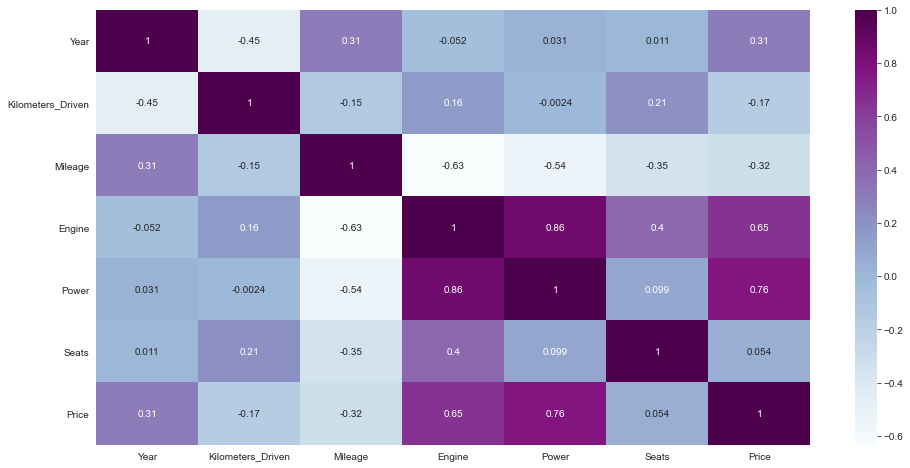

In [92]:
f, ax = plt.subplots(figsize=(16, 8))
dataplot = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.show()

### 1.7 Encoding Categorical Data 

Before we fit the model, it is important to convert all categorical variables to numeric

In [93]:
#Select all the categorical Variables
categ_cols = df.select_dtypes(exclude=np.number).columns.tolist()
categ_cols

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Car Make',
 'Car Model']

In [94]:
#using label encoder
le = LabelEncoder()
#loop through the list of categorical columns
for i in range (len(categ_cols)):
    #using label encoder to transform each categorical column into numeric data
    df[categ_cols[i]] = le.fit_transform(df[categ_cols[i]].values)
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Name Mapping for %s" % categ_cols[i])
    print(le_name_mapping)
    print("")

Name Mapping for Location
{'Ahmedabad': 0, 'Bangalore': 1, 'Chennai': 2, 'Coimbatore': 3, 'Delhi': 4, 'Hyderabad': 5, 'Jaipur': 6, 'Kochi': 7, 'Kolkata': 8, 'Mumbai': 9, 'Pune': 10}

Name Mapping for Fuel_Type
{'CNG': 0, 'Diesel': 1, 'Electric': 2, 'LPG': 3, 'Petrol': 4}

Name Mapping for Transmission
{'Automatic': 0, 'Manual': 1}

Name Mapping for Owner_Type
{'First': 0, 'Fourth & Above': 1, 'Second': 2, 'Third': 3}

Name Mapping for Car Make
{'Ambassador': 0, 'Audi': 1, 'BMW': 2, 'Bentley': 3, 'Chevrolet': 4, 'Datsun': 5, 'Fiat': 6, 'Force': 7, 'Ford': 8, 'Hindustan': 9, 'Honda': 10, 'Hyundai': 11, 'Isuzu': 12, 'Jaguar': 13, 'Jeep': 14, 'Lamborghini': 15, 'Land Rover': 16, 'Mahindra': 17, 'Maruti': 18, 'Mercedes-Benz': 19, 'Mini': 20, 'Mitsubishi': 21, 'Nissan': 22, 'Opel': 23, 'Porsche': 24, 'Renault': 25, 'Skoda': 26, 'Smart': 27, 'Tata': 28, 'Toyota': 29, 'Volkswagen': 30, 'Volvo': 31}

Name Mapping for Car Model
{'1 Series': 0, '1000 AC': 1, '3 Series': 2, '370Z AT': 3, '5 Series

Encoding has been done for all category variables.

In [95]:
#view encoding done
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car Make,Car Model
S.No.,,,,,,,,,,,,,
0,9,2010,72000.0,0,1,0,26.60,998.0,58.16,5.0,1.75,18,650
1,10,2015,41000.0,1,1,0,19.67,1582.0,126.20,5.0,12.50,11,178
2,2,2011,46000.0,4,1,0,18.20,1199.0,88.70,5.0,4.50,10,344
3,2,2012,87000.0,1,1,0,20.77,1248.0,88.76,7.0,6.00,18,245
4,3,2013,40670.0,1,0,2,15.20,1968.0,140.80,5.0,17.74,1,22


### 1.8 Feature Selection

Independent Variables as listed above are 
 - 'Location' 
 - 'Year' 
 - 'Kilometers_Driven' 
 - 'Fuel_Type' '
 - 'Transmission' 
 - 'Owner_Type' 
 - 'Mileage' 
 - 'Engine'
 - 'Power'
 - 'Seats' 
 - 'Car Make'
 - 'Car Model' 

In [96]:
#all columns
cols = df.columns
#rearrange cols
cols = ['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Car Make', 'Car Model', 'Price']
#cols have been rearranged
df = df[cols]
#view arrangemnet of cols
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car Make,Car Model,Price
S.No.,,,,,,,,,,,,,
0,9,2010,72000.0,0,1,0,26.60,998.0,58.16,5.0,18,650,1.75
1,10,2015,41000.0,1,1,0,19.67,1582.0,126.20,5.0,11,178,12.50
2,2,2011,46000.0,4,1,0,18.20,1199.0,88.70,5.0,10,344,4.50
3,2,2012,87000.0,1,1,0,20.77,1248.0,88.76,7.0,18,245,6.00
4,3,2013,40670.0,1,0,2,15.20,1968.0,140.80,5.0,1,22,17.74


In [97]:
#choose Independent Variables
X = df.iloc[:, :-1].values
#view the size
X.shape

(7253, 12)

In [98]:
#choose target variable
y = df.iloc[:,-1].values
y.shape

(7253,)

### 1.9 Train Test Split

In [99]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [100]:
#view Shape of data after split
print("X_train is ", X_train.shape)
print("X_test is ", X_test.shape)
print("y_train is ", y_train.shape)
print("y_test is ", y_test.shape)

X_train is  (5802, 12)
X_test is  (1451, 12)
y_train is  (5802,)
y_test is  (1451,)


We need to perform feature scaling when dealing with gradient descent based algorithms like Linear Regression, Neural network as they are very sensitive to large range of data points 

### 1.10 Feature Scaling

In [101]:
#scaling data by standardization
scaler = StandardScaler()
#standardize the train set
X_train = scaler.fit_transform(X_train)
#standardize the test set
X_test = scaler.fit_transform(X_test)

# 2. Modeling

###  Algorithm Selection

The task is to predict price which is a regression task. The following algorithms will be used;

Linear Models

 - Multiple Linear Regression


Non-linear Models
 - Gradient Boosting 
 - Decision Tree Regressor
 - Random Forest Regressor
 - Support Vector Regressor
 - Neural Networks
    
The task at hand is non-linear, hence non-linear algorithms are expected to perform better.

### 2.1 Multiple Linear Regression

#### 2.1.1 Train the Model

In [102]:
#train model 
model_linearReg = LinearRegression().fit(X_train, y_train)

#### 2.1.2 Make Prediction with Test Set

In [103]:
#make prediction
y_pred_linearReg = model_linearReg.predict(X_test)

#### 2.1.3 Model Evaluation

Model Evaluation using R Squared, MAE (Mean Absolute Error)  and MSE (Mean Squared Error)

In [104]:
#the Mean squared Error
mse_linearReg = mean_squared_error(y_test, y_pred_linearReg)
print("Mean squared error: %.2f"% mse_linearReg)

Mean squared error: 29.82


In [105]:
#the Root mean squared Error
rmse_linearReg = mean_squared_error(y_test, y_pred_linearReg, squared=False)
print("Root mean squared error: %.2f"% rmse_linearReg)

Root mean squared error: 5.46


In [106]:
#the coefficient of determination, 1 being the perfect prediction
r_sq_linearReg = r2_score(y_test, y_pred_linearReg)
print("Coefficient of determination: %.4f"% r_sq_linearReg)

Coefficient of determination: 0.7262


In [107]:
#mean absolute error
mae_linearReg = mean_absolute_error(y_test, y_pred_linearReg)
print("Mean absolute error: %.4f"% mae_linearReg)

Mean absolute error: 3.5697


#### 2.1.4 Improve algorithm by Hyper parameter tuning

Using GridCV for hyper parameter tuning to fine-tune the values so that the algorithm works best for the type of data

In [108]:
# #creating parameter grid containing hyper parameters. 
# parameters_linearReg = {
#     'fit_intercept' : [True, False],
#     'normalize' : [True, False]
# }

# #create model 
# model_linearReg = GridSearchCV(LinearRegression(), param_grid = parameters_linearReg, scoring='neg_mean_squared_error', cv=10)

# #fit model
# model_linearReg.fit(X_train, y_train)

# #get hyperparameters
# print("Tuned Hyperparameters :", model_linearReg.best_params_)

In [109]:
#value of the tuned Hyperparameters
print("Tuned Hyperparameters : {'fit_intercept': True, 'normalize': True}")

Tuned Hyperparameters : {'fit_intercept': True, 'normalize': True}


In [110]:
#train model with hyperparameters
model_linearReg = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

#make prediction
y_pred_linearReg = model_linearReg.predict(X_test)

#the Mean squared Error
mse_linearReg = mean_squared_error(y_test, y_pred_linearReg)
print("Mean squared error: %.2f"% mse_linearReg)


#the Root mean squared Error
rmse_linearReg = mean_squared_error(y_test, y_pred_linearReg, squared=False)
print("Root mean squared error: %.2f"% rmse_linearReg)

#the coefficient of determination, 1 being the perfect prediction
r_sq_linearReg = r2_score(y_test, y_pred_linearReg)
print("Coefficient of determination: %.4f"% r_sq_linearReg)

#mean absolute error
mae_linearReg = mean_absolute_error(y_test, y_pred_linearReg)
print("Mean absolute error: %.4f"% mae_linearReg)

Mean squared error: 29.82
Root mean squared error: 5.46
Coefficient of determination: 0.7262
Mean absolute error: 3.5697


After Hyper parameter tuning, the algorithm yielded the same result for Multiple Linear Regression

### 2.2 Gradient Boosting

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Gradient Boosting is a class of ensemble machine learning algorithm that can be used for classification or regression predictive modeling problems.

#### 2.2.1 Train the Model

In [111]:
#train the model
model_GB = GradientBoostingRegressor().fit(X_train, y_train)

#### 2.2.2 Make Prediction with Test Set

In [112]:
#make prediction
y_pred_GB = model_GB.predict(X_test)

#### 2.2.3 Model Evaluation

In [113]:
#the Mean squared Error
mse_GB = mean_squared_error(y_test, y_pred_GB)
print("Mean squared error: %.2f"% mse_GB)

Mean squared error: 12.73


MSE is significantly reduced compared to the algorithm listed above.

In [114]:
#the Root mean squared Error
rmse_GB = mean_squared_error(y_test, y_pred_GB, squared=False)
print("Root Mean squared error: %.2f"% rmse_GB)

Root Mean squared error: 3.57


In [115]:
#the coefficient of determination, 1 being the perfect prediction
r_sq_GB = r2_score(y_test, y_pred_GB)
print("Coefficient of determination: %.4f"% r_sq_GB)

Coefficient of determination: 0.8831


In [116]:
#mean absolute error
mae_GB = mean_absolute_error(y_test, y_pred_GB)
print("Mean absolute error: %.4f"% mae_GB)

Mean absolute error: 1.9004


#### 2.2.4 Improve algorithm by Hyper parameter tuning

In [117]:
# #creating parameter grid containing hyper parameters. 
# parameters_GB = {
#     'n_estimators' : [100, 500, 1000],
#     'learning_rate' : [0.01, 0.1, 1.0]
# }

# #create model 
# model_GB = GridSearchCV(GradientBoostingRegressor(), param_grid = parameters_GB, scoring='neg_mean_squared_error', cv=10)

# #fit model
# model_GB.fit(X_train, y_train)

# #get hyperparameters
# print("Tuned Hyperparameters :", model_GB.best_params_)

In [118]:
#value of tuned hyperparameters
print("Tuned Hyperparameters : {'learning_rate': 0.1, 'n_estimators': 1000}")

Tuned Hyperparameters : {'learning_rate': 0.1, 'n_estimators': 1000}


In [119]:
#train model with hyper paramters 
model_GB = GradientBoostingRegressor(n_estimators=1000 ,learning_rate=0.1).fit(X_train, y_train)

#make prediction
y_pred_GB = model_GB.predict(X_test)

#the Mean squared Error
mse_GB = mean_squared_error(y_test, y_pred_GB)
print("Mean squared error: %.2f"% mse_GB)

#the Root mean squared Error
rmse_GB = mean_squared_error(y_test, y_pred_GB, squared=False)
print("Root mean squared error: %.2f"% rmse_GB)

#the coefficient of determination, 1 being the perfect prediction
r_sq_GB = r2_score(y_test, y_pred_GB)
print("Coefficient of determination: %.4f"% r_sq_GB)

#mean absolute error
mae_GB = mean_absolute_error(y_test, y_pred_GB)
print("Mean absolute error: %.4f"% mae_GB)

Mean squared error: 12.02
Root mean squared error: 3.47
Coefficient of determination: 0.8897
Mean absolute error: 1.7553


MSE reduced, MAE reduced after hyper parameter tuning, r2 score increased 

Gradient Boosting is susceptible to overfitting as  raising the number of gradients boosting iterations too high increases overfitting. It appears to overfit as accuracy for training is more than accuracy for testing.

Try non-linear models like the onest listed below. However R_squrd is useless here. 

### 2.3 Decision Tree Regressor

#### 2.3.1 Train the Model

In [120]:
#train the model
model_tree = DecisionTreeRegressor().fit(X_train, y_train)

#### 2.3.2 Make Prediction with Test Set

In [121]:
#predict using test set
y_pred_tree = model_tree.predict(X_test)

#### 2.3.3 Model Evaluation

In [122]:
#the Mean squared Error
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean squared error: %.2f"% mse_tree)

Mean squared error: 24.68


In [123]:
#the Root mean squared Error
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print("Root mean squared error: %.2f"% rmse_tree)

Root mean squared error: 4.97


In [124]:
#the coefficient of determination, 1 being the perfect prediction
r_sq_tree = r2_score(y_test, y_pred_tree)
print("Coefficient of determination: %.4f"% r_sq_tree)

Coefficient of determination: 0.7734


In [125]:
#mean absolute error
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print("Mean absolute error: %.4f"% mae_tree)

Mean absolute error: 2.2510


#### 2.3.4 Improve algorithm by Hyper parameter tuning

In [126]:
# #creating parameter grid containing hyper parameters. 
# parameters_tree = {
#     'min_samples_split' : [2, 4, 6],
#     'min_samples_leaf' : [1, 3, 5],
#     'random_state' : [5, 10, 20]
# }

# #create model 
# model_tree = GridSearchCV(DecisionTreeRegressor(), param_grid = parameters_tree, scoring='neg_mean_squared_error', cv=10)

# #fit model
# model_tree.fit(X_train, y_train)

# #get hyperparameters
# print("Tuned Hyperparameters :", model_tree.best_params_)

In [127]:
#obtained value of hyperparameters 
print("Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 5}")

Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 6, 'random_state': 5}


In [128]:
#train model with hyper paramters 
model_tree = DecisionTreeRegressor(min_samples_leaf=1, min_samples_split=6, random_state=5).fit(X_train, y_train)

#make prediction
y_pred_tree = model_tree.predict(X_test)

#the Mean squared Error
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean squared error: %.2f"% mse_tree)

#the Root mean squared Error
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print("Root Mean squared error: %.2f"% rmse_tree)

#the coefficient of determination, 1 being the perfect prediction
r_sq_tree = r2_score(y_test, y_pred_tree)
print("Coefficient of determination: %.4f"% r_sq_tree)

#mean absolute error
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print("Mean absolute error: %.4f"% mae_tree)

Mean squared error: 22.25
Root Mean squared error: 4.72
Coefficient of determination: 0.7957
Mean absolute error: 2.1767


### 2.4 Random Forest Regressor

#### 2.4.1 Train the Model

In [129]:
#train the model
model_forest = RandomForestRegressor().fit(X_train, y_train)

#### 2.4.2 Make Prediction with Test Set

In [130]:
#make prediction with test set
y_pred_forest = model_forest.predict(X_test)

#### 2.4.3 Model Evaluation

In [131]:
#the Mean squared Error
mse_forest = mean_squared_error(y_test, y_pred_forest)
print("Mean squared error: %.2f"% mse_forest)

Mean squared error: 10.60


In [132]:
#the root mean squared Error
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
print("Root Mean squared error: %.2f"% rmse_forest)

Root Mean squared error: 3.26


In [133]:
#the coefficient of determination, 1 being the perfect prediction
r_sq_forest = r2_score(y_test, y_pred_forest)
print("Coefficient of determination: %.4f"% r_sq_forest)

Coefficient of determination: 0.9027


In [134]:
#mean absolute error
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print("Mean absolute error: %.4f"% mae_forest)

Mean absolute error: 1.5993


#### 2.3.4 Improve algorithm by Hyper parameter tuning

In [135]:
# #creating parameter grid containing hyper parameters. 
# parameters_forest = {
#     'n_estimators' : [100, 500, 1000],
#     'min_samples_split' : [2, 4, 6],
#     'random_state' : [5, 10, 20]
# }

# #create model 
# model_forest = GridSearchCV(RandomForestRegressor(), param_grid = parameters_forest, scoring='neg_mean_squared_error', cv=10)

# #fit model
# model_forest.fit(X_train, y_train)

# #get hyperparameters
# print("Tuned Hyperparameters :", model_forest.best_params_)

In [136]:
#obtained value of Hyperparameters
print("Tuned Hyperparameters : {'min_samples_split': 2, 'n_estimators': 100, 'random_state': 20}")

Tuned Hyperparameters : {'min_samples_split': 2, 'n_estimators': 100, 'random_state': 20}


In [137]:
#train model with hyper paramters 
model_forest = RandomForestRegressor(n_estimators= 100, min_samples_split= 2, random_state= 20).fit(X_train, y_train)

#make prediction
y_pred_forest = model_forest.predict(X_test)

#the Mean squared Error
mse_forest = mean_squared_error(y_test, y_pred_forest)
print("Mean squared error: %.2f"% mse_forest)

#the Root mean squared Error
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)
print("Root Mean squared error: %.2f"% rmse_forest)

#the coefficient of determination, 1 being the perfect prediction
r_sq_forest = r2_score(y_test, y_pred_forest)
print("Coefficient of determination: %.4f"% r_sq_forest)

#mean absolute error
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print("Mean absolute error: %.4f"% mae_forest)

Mean squared error: 11.05
Root Mean squared error: 3.32
Coefficient of determination: 0.8986
Mean absolute error: 1.5933


### 2.5 Support Vector Regressor

#### 2.5.1 Train the Model

In [138]:
#train the model
model_svr = SVR().fit(X_train, y_train)

#### 2.5.2 Make Prediction with Test Set

In [139]:
#make prediction with test set
y_pred_svr = model_svr.predict(X_test)

#### 2.5.3 Model Evaluation

In [140]:
#the Mean squared Error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean squared error: %.2f"% mse_svr)

Mean squared error: 25.85


In [141]:
#the Root mean squared Error
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
print("Root mean squared error: %.2f"% rmse_svr)

Root mean squared error: 5.08


In [142]:
#the coefficient of determination, 1 being the perfect prediction
r_sq_svr = r2_score(y_test, y_pred_svr)
print("Coefficient of determination: %.4f"% r_sq_svr)

Coefficient of determination: 0.7627


In [143]:
#mean absolute error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean absolute error: %.4f"% mae_svr)

Mean absolute error: 2.0382


#### 2.5.4 Improve algorithm by Hyper parameter tuning

In [144]:
# #creating parameter grid containing hyper parameters. 
# parameters_svr = {
#    'C' : [3.0, 6.0, 9.0],
#     'epsilon' : [0.1, 0.3, 0.5],
#     'kernel':["rbf","poly", "linear"]
# }

# #create model 
# model_svr = GridSearchCV(SVR(), param_grid = parameters_svr, scoring='neg_mean_squared_error', cv=10)

# #fit model
# model_svr.fit(X_train, y_train)

# #get hyperparameters
# print("Tuned Hyperparameters :", model_svr.best_params_)

In [145]:
#display value of tuned hyperparameters
print("Tuned Hyperparameters : {'C': 9.0, 'epsilon': 0.5, 'kernel': 'rbf'}")

Tuned Hyperparameters : {'C': 9.0, 'epsilon': 0.5, 'kernel': 'rbf'}


In [146]:
#train model with hyper paramters 
model_svr = SVR(C=9.0, epsilon=0.3, kernel="rbf").fit(X_train, y_train)

#make prediction
y_pred_svr = model_svr.predict(X_test)

#the Mean squared Error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean squared error: %.2f"% mse_svr)

#the Root mean squared Error
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
print("Root mean squared error: %.2f"% rmse_svr)

#the coefficient of determination, 1 being the perfect prediction
r_sq_svr = r2_score(y_test, y_pred_svr)
print("Coefficient of determination: %.4f"% r_sq_svr)

#mean absolute error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean absolute error: %.4f"% mae_svr)

Mean squared error: 15.49
Root mean squared error: 3.94
Coefficient of determination: 0.8577
Mean absolute error: 1.7092


My work is perfoming better on nonlinear algorithms

### 2.6 Neural Network Regressor

AI Neural networks allow our model to learn the complex non-linear relationships between features and the target variable. They learn using an activation function in each layer. 

Vanilla neural networks allow us to deal with structured data only. The activation function introduces non-linearity in the relatioship. Each layer can also have regularizers which prevent overfitting. 

#### Using Tensor FLow

In [147]:
#using 4 layers and assigning no of neurons to them. 
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01


In [148]:
#creating the model using sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'), Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'), Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'), 
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

In [149]:
#build the model
model_NN = build_model_using_sequential()

compile the model with training configurations

we use mean squared logarithmic function as Loss Function and metric

In [150]:
#loss function and metric
msle_NN = MeanSquaredLogarithmicError()
#loss function is used to optimize the model whereas the metric is for reference
#compile the model. 
model_NN.compile(loss=msle_NN, optimizer=Adam(learning_rate=learning_rate), metrics=[msle_NN])

In [151]:
#train the modelM
history = model_NN.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
73/73 [==============================] - 1s 5ms/step - loss: 0.2299 - mean_squared_logarithmic_error: 0.2290 - val_loss: 0.0783 - val_mean_squared_logarithmic_error: 0.0781
Epoch 2/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0775 - mean_squared_logarithmic_error: 0.0774 - val_loss: 0.0658 - val_mean_squared_logarithmic_error: 0.0657
Epoch 3/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0744 - mean_squared_logarithmic_error: 0.0744 - val_loss: 0.0653 - val_mean_squared_logarithmic_error: 0.0651
Epoch 4/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0702 - mean_squared_logarithmic_error: 0.0702 - val_loss: 0.0801 - val_mean_squared_logarithmic_error: 0.0791
Epoch 5/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0686 - mean_squared_logarithmic_error: 0.0684 - val_loss: 0.0629 - val_mean_squared_logarithmic_error: 0.0632
Epoch 6/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0680 -

73/73 [==============================] - 0s 3ms/step - loss: 0.0431 - mean_squared_logarithmic_error: 0.0431 - val_loss: 0.0469 - val_mean_squared_logarithmic_error: 0.0464
Epoch 46/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0432 - mean_squared_logarithmic_error: 0.0431 - val_loss: 0.0477 - val_mean_squared_logarithmic_error: 0.0476
Epoch 47/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0440 - mean_squared_logarithmic_error: 0.0439 - val_loss: 0.0474 - val_mean_squared_logarithmic_error: 0.0471
Epoch 48/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0455 - mean_squared_logarithmic_error: 0.0454 - val_loss: 0.0457 - val_mean_squared_logarithmic_error: 0.0452
Epoch 49/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0444 - mean_squared_logarithmic_error: 0.0442 - val_loss: 0.0445 - val_mean_squared_logarithmic_error: 0.0441
Epoch 50/50
73/73 [==============================] - 0s 3ms/step - loss: 0.0422 - mean_

In [152]:
#lets visualize our progress
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()

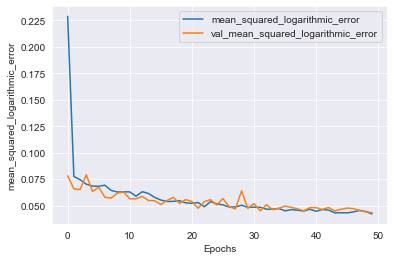

In [153]:
#Visualize the history
plot_history(history, 'mean_squared_logarithmic_error')

#### 2.6.2 Make Prediction with Test Set

In [154]:
y_pred_NN = model_NN.predict(X_test)

#### 2.6.3 Model Evaluation

In [155]:
#the Mean squared Error
mse_NN = mean_squared_error(y_test, y_pred_NN)
print("Mean squared error: %.2f"% mse_NN)

Mean squared error: 14.07


In [156]:
#the Root Mean squared Error
rmse_NN = mean_squared_error(y_test, y_pred_NN, squared=False)
print("Root mean squared error: %.2f"% rmse_NN)

Root mean squared error: 3.75


In [157]:
#the coefficient of determination, 1 being the perfect prediction
r_sq_NN = r2_score(y_test, y_pred_NN)
print("Coefficient of determination: %.4f"% r_sq_NN)


Coefficient of determination: 0.8708


In [158]:
#mean absolute error
mae_NN = mean_absolute_error(y_test, y_pred_NN)
print("Mean absolute error: %.4f"% mae_NN)

Mean absolute error: 1.7151


### 2.7 Compare Algorithms Based on Evaluation Metrics

Comparing the algorithms based on mean squared error (MSE) whereby the algorithm with the least mse is the most preferred algorithm for the machine learning application. 

In [159]:
#create a dataframe that contains a list of mse of all algorithms
mean_squared_errors = pd.DataFrame({"Algorithm": ["Multiple Linear Regression"
                                                 , "Gradient Boosting",
                                                "Decision Tree Regressor", 
                                                "Random Forest Regressor", 
                                                "Support Vector Regressor",
                                                "Neural Networks"], 
                                   "Mean Squared Error": [mse_linearReg, 
                                                          mse_GB, 
                                                          mse_tree, 
                                                          mse_forest,
                                                          mse_svr, 
                                                          mse_NN],
                                   "Root Mean Squared Error": [rmse_linearReg, 
                                                          rmse_GB, 
                                                          rmse_tree, 
                                                          rmse_forest,
                                                          rmse_svr, 
                                                          rmse_NN],
                                   "Mean Absolute Error": [mae_linearReg, 
                                                          mae_GB, 
                                                          mae_tree, 
                                                          mae_forest,
                                                          mae_svr, 
                                                          mae_NN],
                                   "R-Squared": [r_sq_linearReg, 
                                                          r_sq_GB, 
                                                          r_sq_tree, 
                                                          r_sq_forest,
                                                          r_sq_svr, 
                                                          r_sq_NN]})
mean_squared_errors = mean_squared_errors.sort_values(by="Mean Squared Error", ascending=True)
mean_squared_errors

,Algorithm,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-Squared
3,Random Forest Regressor,11.045813,3.323524,1.593326,0.898570
1,Gradient Boosting,12.017088,3.466567,1.755271,0.889651
5,Neural Networks,14.070624,3.751083,1.715141,0.870794
4,Support Vector Regressor,15.494172,3.936264,1.709210,0.857722
2,Decision Tree Regressor,22.247454,4.716721,2.176652,0.795709
0,Multiple Linear Regression,29.816893,5.460485,3.569663,0.726202


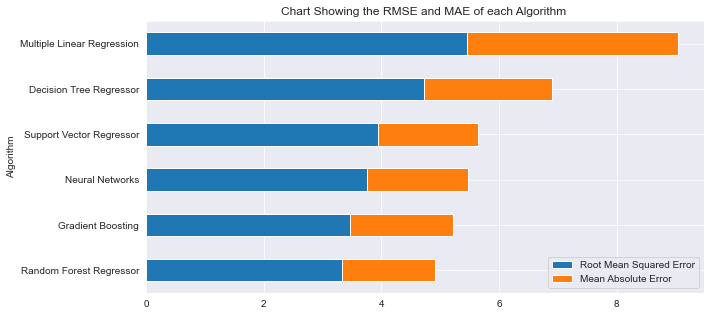

In [160]:
#plot the algorithms against the error (MAE and RMSE)
mean_squared_errors.plot.barh(x="Algorithm", y=["Root Mean Squared Error", "Mean Absolute Error"], stacked=True, rot=0, figsize=(10, 5))
plt.title("Chart Showing the RMSE and MAE of each Algorithm ")
plt.show()

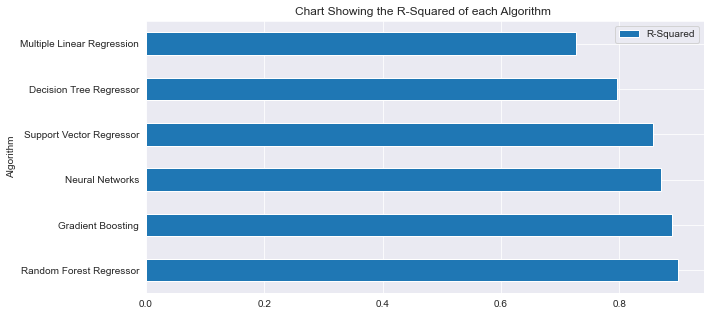

In [161]:
#plot the algorithms against the r-squared 
mean_squared_errors.plot.barh(x="Algorithm", y="R-Squared", stacked=True, rot=0, figsize=(10, 5))
plt.title("Chart Showing the R-Squared of each Algorithm ")
plt.show()

References

DARADE, Y. (2021). Predict Used Car prices- LinearRegression. [online] kaggle.com.
Available https://www.kaggle.com/code/yogidsba/predic t-used-car-prices-linearregression/notebook.
    
NGUYEN, H.D. (2021). Used car price estimation: 96% Accuracy. [online] kaggle.com.
Available at https://www.kaggle.com/code/winternguyen/u sed-car-price-estimation-96- accuracy/notebook#VII.-REFERENCES [Accessed 16 May 2022].